# Bryne's Euclid: Book I

```epigraph
*Elements* is a *tour de force*. Theorem, theorem, problem, theorem, all laid out in confident succession. It was not always known that from simple rules you could rigorously deduce beautiful facts. It was not always known that you could start with so little, and end with so much.

--TurnTrout
```

References:
- [Elementary Euclid](https://www.c82.net/euclid/book1/)

## Definitions

### Definition I: Points
A *point* is that which has no parts.

But in python, a point in $\mathbb R^2$ has two parts: $x$ and $y$ representing the coordinates:

In [1]:
from dataclasses import dataclass
from nptyping import NDArray, Shape, Float, Int
from typing import NewType
import numpy as np

P2=NewType('P2',NDArray[Shape["1, 2"], Float])

def p2(x:float,y:float)->P2:
    return P2(np.array([x,y]))

def polar2(r:float,theta:float)->P2:
    return P2(np.array([r*np.cos(theta),r*np.sin(theta)]))
    
def unp2(p:P2)->tuple[float,float]:
    return (p[0],p[1])

def unpolar2(p:P2)->tuple[float,float]:
    r = np.sqrt(p[0]*p[0]+p[1]*p[1])
    return (np.sqrt(p[0]*p[0]+p[1]*p[1]),np.arctan2(p[1],p[0]))


In [2]:
p1=p2(1,0)
print(p1)

[1 0]


In [3]:
pp2=polar2(1,np.pi/4.0)
print(p2)

<function p2 at 0x7f84a4f153a0>


In [4]:
unp2(p1+pp2)

(1.7071067811865475, 0.7071067811865475)

In [5]:
unpolar2(p1-pp2)

(0.7653668647301795, -1.1780972450961724)

In [6]:
type(p1)

numpy.ndarray

### Definition II: Line
A *line* is length without breadth.

### Definition III: Line and points
The extremities of a line are points.

### Definition IV: Straight line
A *straight* or right line is that which lies evenly between its extremities.

In [7]:
@dataclass
class Line2(): # two dimensional straight line
    e1:P2
    e2:P2

    def __init__(self,e1:P2,e2:P2)->None:
        self.e1=e1; self.e2=e2

    def length(self)->float:
        d=self.e2-self.e2
        return np.sqrt(d[0]*d[0]+d[1]*d[1])
    
    def __repr__(self) -> str:
        return str((tuple(self.e1),tuple(self.e2)))

In [8]:
Line2(p2(1,0),p2(0,1))

((1, 0), (0, 1))

Let's graduately build up the drawing library so we can visualize the geometrical objects and verify concepts. Considering the fact that we could use different drawing packages, we need to abtract the drawing logic and defining the necessary interfaces so that our library is extentable.

The packages currently under consideration are the matplotlib in python and tikz/pgf in latex.

The follloing are the abstract layer of the library:

In [9]:
from typing import TypeVar, Generic, Iterable, Protocol, Iterator
from abc import ABCMeta, abstractmethod
A=TypeVar('A')

class Shape(Generic[A]):
    pass

class Drawable(list[Shape]):
    pass

class Renderer(Generic[A]):
    @abstractmethod
    def save(self,filename:str,transparent:bool)->None: ...

class Draw(Protocol):
    def diagram(self,g:Drawable)->Renderer[A]: ...

The matplotlib implementation of the above abstract layer is as follows.

Matplotlib impl of `Shape`

In [10]:
from matplotlib.lines import Line2D

import matplotlib.axes

class ShapeMPL(Shape):
    @abstractmethod
    def add_object(self,ax:matplotlib.axes.Axes)->None: ...

class LineMPL(ShapeMPL):
    def __init__(self,line:Line2)->None:
        self.line=Line2D([line.e1[0],line.e2[0]],[line.e1[1],line.e2[1]],color='blue',linewidth=2)
    def __repr__(self)->str:
        x=self.line.get_xdata(); y=self.line.get_ydata()
        return str(([x[0],y[0]],[x[1],y[1]]))
    def add_object(self,ax:matplotlib.axes.Axes)->None:
        ax.add_line(self.line)

Matplotlib impl of `Rederer`

In [11]:
import matplotlib.figure
import matplotlib.axes

class RendererMLP(Renderer[ShapeMPL]):
    def __init__(self,ax:matplotlib.axes.Axes,fig:matplotlib.figure.Figure)->None:
        self.ax=ax;  self.fig=fig
    def save(self,filename:str,transparent:bool=False)->None:
        self.fig.savefig(filename,transparent=transparent)

Matplotlib impl of the `Drawable` and `Draw` interface

In [12]:
import matplotlib.pyplot as plt

class DrawMLP(Drawable):
    def __init__(self,gs:list[ShapeMPL]):
        self.graph_objects=gs
    def diagram(self,size:tuple[float,float]=(8,8))->RendererMLP:
        fig,ax = plt.subplots(figsize=size)
        for i in self.graph_objects: i.add_object(ax) # delegate the job to graph objects to add themself to ax
        return RendererMLP(ax,fig)
    def __iter__(self)->Iterable[ShapeMPL]:
        return self.graph_objects.__iter__()
    def __repr__(self)->str:
        return self.graph_objects.__repr__()

(0.0, 1.0, 0.0, 1.0)

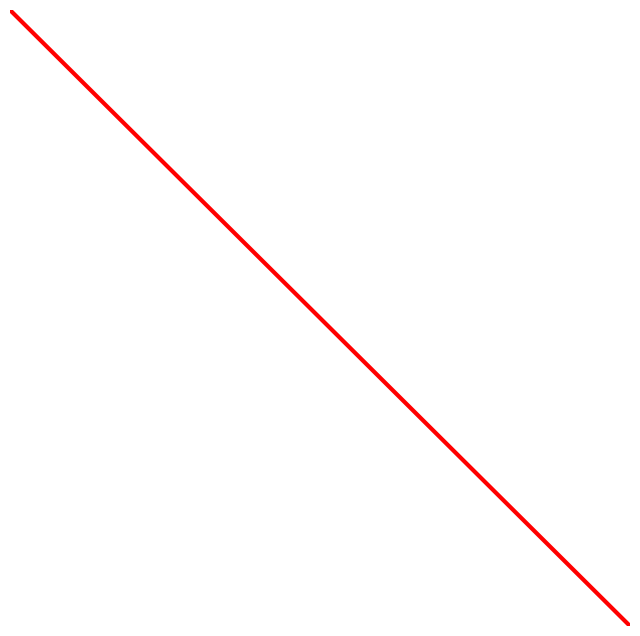

In [13]:
l=LineMPL(Line2(p2(1,0),p2(0,1)))
l.line.set_color('red')
l.line.set_linewidth(3)
d=DrawMLP([l])
r=d.diagram()
plt.axis('off')

### Definition V: Surface
A *surface* is that which has length and breadth only.

### Definition VI: Surface and lines
The extremities of a surface are lines.

### Definition VII: Plane
A plane surface is that which lies evenly between its extremities.

### Definition VIII: Plane angle
A *plane angle* is the inclination of two lines to one another, in a plane, which meet together, but are not in the same direction.

### Definition IX: Plane rectilinear angle
A *plane rectilinear angle* is the inclination of two straight lines to one another, which meet together, but are not in the same straight line.

### Definition X: Right angle, perpendicular lines
When one straight line standing on another straight line makes the adjacent angles equal, each of these angles is called a *right angle*, and each of these lines is said to be *perpendicular* to the other.

### Definition XI: Obtuse angle
An *obtuse angle* is an angle greater than a right angle.

### Definition XII: Acute angle
An *acute angle* is leſs than a right angle.

### Definition XIII: Term and boundary
A *term* or *boundary* is the extremity of any thing.

### Definition XIV: Figure
A *figure* is a surface enclosed on all sides by a line or lines.

### Definition XV: Circle
A *circle* is a plane figure, bounded by one continued line, called its *circumference* or *periphery*; and having a certain point within it, from which all straight lines drawn to its circumference are equal.

### Definition XVI: The center of a circle
This point (from which the equal lines are drawn) is called the *centre* of the circle.

In [16]:
@dataclass
class Circle:
    center:P2
    radius:float
def __init__(self,r:float,center=(0,0)):
    self.center=center
    self.radius=r

In [17]:
import matplotlib.patches
from matplotlib.path import Path
import matplotlib.axes

class CircleMPL(ShapeMPL):
    def __init__(self,cir:Circle)->None:
        self.circle=matplotlib.patches.Circle(xy=(cir.center[0],cir.center[1]),radius=cir.radius)
    def __repr__(self)->str:
        o=self.circle.get_center(); r=self.circle.get_radius
        return str((r,o))
    def add_object(self,ax:matplotlib.axes.Axes)->None:
        ax.add_patch(self.circle)

### Definition XVII: Diameter of a circle
A *diameter* of a circle is a straight line drawn through the centre, terminated both ways in the circumference.

### Definition XVIII: Semicircle
A *semicircle* is the figure contained by the diameter, and the part of the circle cut off by the diameter.

### Definition XIX: Segment of a circle
A segment of a circle is a figure contained by a straight line, and the part of the circumference which it cuts off.

### Definition XX: Rectilinear figure
A figure contained by straight lines only, is called a rectilinear figure.

### Definition XXI: Triangle
A triangle is a rectilinear figure included by three sides.

### Definition XXII: Quadrilateral figure
A *quadrilateral figure* is one which is bounded by four sides. The straight lines {tikz}`[blue,thick] \draw[->] (0,0) -- (1,0);` and {tikz}`[red,thick] \draw[->] (0,0) -- (1,0);` connecting the vertices of the oppoſite angles of a quadrilateral figure, are called its diagonal.

In [15]:
from Contexts.Foldable import foldl

@dataclass
class Plane2():
    boundary:list[Line2]
    vertices:list[P2]

    def __init__(self,v:list[P2]):
        if len(v)>=4:
            self.vertices = v
            self.boundary=foldl(lambda acc,x:acc+[Line2(acc[-1].e2,x)],[Line2(v[0],v[1])],v[1:]+[v[0]])
        else:
            raise ValueError("Illegal number of vertices")
        
    def length(self)->float:
        pass
    def width(self)->float: # breadth
        pass
    def angles(self)->list[float]: # rectlinear angle
        pass